<h2>データの読み込み、整形</h2>

In [1]:
# ライブラリのインポート
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ワーニングを非表示にする設定(任意)
import warnings
warnings.simplefilter('ignore')

In [3]:
# 最大表示行数の指定(任意:ここでは10行を指定)
pd.set_option('display.max_rows', 10)

In [4]:
# pandas_datareaderを使って、2018年始から2021年末までの日経平均株価データの取得
start = '2018-01-01'
end = '2021-12-31'
data_master = data.DataReader('^N225', 'yahoo', start, end)
data_master

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688
...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156


In [5]:
# 曜日情報を追加(0:月曜日〜4:金曜日)
data_master['weekday'] = data_master.index.weekday
data_master

,High,Low,Open,Close,Volume,Adj Close,weekday
Date,,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078,3
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297,4
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234,1
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219,2
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688,3
...,...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156,1


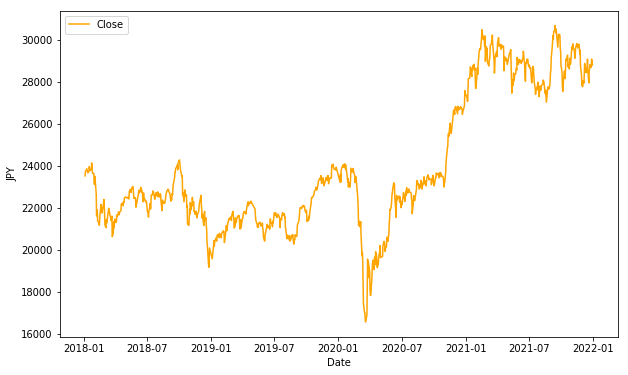

In [30]:
# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(data_master['Close'], label='Close', color='orange')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

<h2>説明変数の追加と目的変数の設定</h2>

In [7]:
# data_techinicalにデータをコピー
data_technical = data_master.copy()

In [8]:
# 移動平均を追加
SMA1 = 5   #短期5日
SMA2 = 10  #中期10日
SMA3 = 15  #長期15日

data_technical['SMA1'] = data_technical['Close'].rolling(SMA1).mean() #短期移動平均の算出
data_technical['SMA2'] = data_technical['Close'].rolling(SMA2).mean() #中期移動平均の算出
data_technical['SMA3'] = data_technical['Close'].rolling(SMA3).mean() #長期移動平均の算出

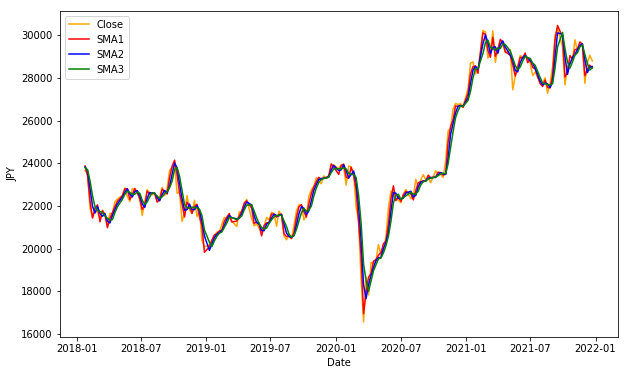

In [31]:
# 特徴量を描画して確認
plt.figure(figsize=(10, 6))

plt.plot(data_technical['Close'], label='Close', color='orange')
plt.plot(data_technical['SMA1'], label='SMA1', color='red')
plt.plot(data_technical['SMA2'], label='SMA2', color='blue')
plt.plot(data_technical['SMA3'], label='SMA3', color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

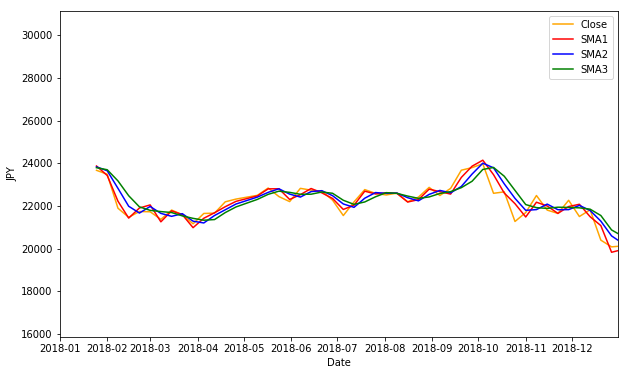

In [32]:
# 特徴量を描画して確認(x軸の拡大)
plt.figure(figsize=(10, 6))

plt.plot(data_technical['Close'], label='Close', color='orange')
plt.plot(data_technical['SMA1'], label='SMA1', color='red')
plt.plot(data_technical['SMA2'], label='SMA2', color='blue')
plt.plot(data_technical['SMA3'], label='SMA3', color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
xmin = datetime(2018,1,1)
xmax = datetime(2018,12,31)
plt.xlim([xmin,xmax])
plt.show()

In [11]:
# OpenとCloseの差分を実体Bodyとして計算
data_technical['Body'] = data_technical['Open'] - data_technical['Close']

# 前日終値との差分Close_diffを計算
data_technical['Close_diff'] = data_technical['Close'].diff(1)

# 目的変数となる翌日の終値Close_nextの追加
data_technical['Close_next'] = data_technical['Close'].shift(-1)
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078,3,NaN,NaN,NaN,-432.599609,NaN,23714.529297
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297,4,NaN,NaN,NaN,-71.529297,208.199219,23849.990234
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234,1,NaN,NaN,NaN,98.980469,135.460938,23788.199219
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219,2,NaN,NaN,NaN,44.611328,-61.791016,23710.429688
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688,3,23713.895703,NaN,NaN,-54.039062,-77.769531,23653.820312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4,28519.714062,28574.342187,28543.350000,53.460938,-15.779297,28676.460938
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0,28667.444141,28577.939258,28593.289453,109.869141,-106.128906,29069.160156
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156,1,28777.758203,28641.591211,28634.193490,-115.839844,392.699219,28906.880859


In [12]:
# 欠損値がある行を削除
data_technical = data_technical.dropna(how='any')
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81500000.0,23669.490234,3,23871.762109,23831.103125,23792.033984,81.160156,-271.289062,23631.880859
2018-01-26,23797.960938,23592.279297,23757.339844,23631.880859,87200000.0,23631.880859,4,23836.526172,23828.909180,23800.404036,125.458984,-37.609375,23629.339844
2018-01-29,23787.230469,23580.169922,23707.140625,23629.339844,68800000.0,23629.339844,0,23799.128125,23820.355078,23794.724740,77.800781,-2.541016,23291.970703
2018-01-30,23581.980469,23233.369141,23559.330078,23291.970703,88800000.0,23291.970703,1,23632.692188,23754.371094,23757.523438,267.359375,-337.369141,23098.289062
2018-01-31,23375.380859,23092.849609,23205.230469,23098.289062,99800000.0,23098.289062,2,23464.194141,23677.366016,23711.529427,106.941406,-193.681641,23486.109375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,28798.369141,28640.150391,28703.009766,28798.369141,43600000.0,28798.369141,3,28472.332031,28539.860156,28493.148698,-95.359375,236.158203,28782.589844
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4,28519.714062,28574.342187,28543.350000,53.460938,-15.779297,28676.460938
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0,28667.444141,28577.939258,28593.289453,109.869141,-106.128906,29069.160156


In [13]:
# 木曜日のデータを抜き出す
data_technical = data_technical[data_technical['weekday'] == 3]
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81500000.0,23669.490234,3,23871.762109,23831.103125,23792.033984,81.160156,-271.289062,23631.880859
2018-02-01,23492.769531,23211.119141,23276.099609,23486.109375,101800000.0,23486.109375,3,23427.517969,23649.640039,23696.574740,-210.009766,387.820312,23274.529297
2018-02-08,21977.029297,21649.699219,21721.570312,21890.859375,104700000.0,21890.859375,3,22220.615625,22824.066797,23173.298568,-169.289062,245.490234,21382.619141
2018-02-15,21578.990234,21308.919922,21384.099609,21464.980469,86400000.0,21464.980469,3,21427.461719,21983.563672,22477.107161,-80.880859,310.810547,21720.250000
2018-02-22,21799.400391,21626.849609,21789.880859,21736.439453,77300000.0,21736.439453,3,21900.362109,21663.911914,21955.829818,53.441406,-234.371094,21892.779297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29444.449219,29469.650391,29499.279297,50700000.0,29499.279297,3,29584.115625,29608.165820,29559.125911,-29.628906,196.619141,28751.619141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,77400000.0,27753.369141,3,28109.257422,28846.686523,29108.529687,-37.169922,-182.250000,28029.570312
2021-12-09,28908.289062,28725.470703,28827.320312,28725.470703,54400000.0,28725.470703,3,28399.725781,28254.491602,28697.699609,101.849609,-135.148438,28437.769531


In [14]:
# 必要なカラムを抽出
data_technical = data_technical[['High', 'Low', 'Open', 'Close', 'Body',
                    'Close_diff', 'SMA1', 'SMA2', 'SMA3', 'Close_next']]
data_technical

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81.160156,-271.289062,23871.762109,23831.103125,23792.033984,23631.880859
2018-02-01,23492.769531,23211.119141,23276.099609,23486.109375,-210.009766,387.820312,23427.517969,23649.640039,23696.574740,23274.529297
2018-02-08,21977.029297,21649.699219,21721.570312,21890.859375,-169.289062,245.490234,22220.615625,22824.066797,23173.298568,21382.619141
2018-02-15,21578.990234,21308.919922,21384.099609,21464.980469,-80.880859,310.810547,21427.461719,21983.563672,22477.107161,21720.250000
2018-02-22,21799.400391,21626.849609,21789.880859,21736.439453,53.441406,-234.371094,21900.362109,21663.911914,21955.829818,21892.779297
...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29444.449219,29469.650391,29499.279297,-29.628906,196.619141,29584.115625,29608.165820,29559.125911,28751.619141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,-37.169922,-182.250000,28109.257422,28846.686523,29108.529687,28029.570312
2021-12-09,28908.289062,28725.470703,28827.320312,28725.470703,101.849609,-135.148438,28399.725781,28254.491602,28697.699609,28437.769531


<h2>学習用データとテストデータに分割</h2>

In [15]:
# 2018年〜2020年を学習用データとする
train = data_technical['2018-01-01' : '2020-12-31']
train

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2018-01-25,23828.400391,23649.029297,23750.650391,23669.490234,81.160156,-271.289062,23871.762109,23831.103125,23792.033984,23631.880859
2018-02-01,23492.769531,23211.119141,23276.099609,23486.109375,-210.009766,387.820312,23427.517969,23649.640039,23696.574740,23274.529297
2018-02-08,21977.029297,21649.699219,21721.570312,21890.859375,-169.289062,245.490234,22220.615625,22824.066797,23173.298568,21382.619141
2018-02-15,21578.990234,21308.919922,21384.099609,21464.980469,-80.880859,310.810547,21427.461719,21983.563672,22477.107161,21720.250000
2018-02-22,21799.400391,21626.849609,21789.880859,21736.439453,53.441406,-234.371094,21900.362109,21663.911914,21955.829818,21892.779297
...,...,...,...,...,...,...,...,...,...,...
2020-11-26,26560.029297,26255.470703,26255.470703,26537.310547,-281.839844,240.451172,26032.293750,25871.790820,25482.896484,26644.710938
2020-12-03,26868.089844,26719.230469,26740.300781,26809.369141,-69.068359,8.388672,26695.243750,26363.768750,26146.275130,26751.240234
2020-12-10,26852.769531,26639.980469,26688.500000,26756.240234,-67.740234,-61.699219,26667.987891,26681.615820,26465.175130,26652.519531


In [16]:
# 2021年をテストデータとする
test = data_technical['2021-01-01' :]
test

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2021-01-07,27624.730469,27340.460938,27340.460938,27490.130859,-149.669922,434.191406,27281.450391,27067.917969,26943.830078,28139.029297
2021-01-14,28979.529297,28411.580078,28442.730469,28698.259766,-255.529297,241.669922,28189.669922,27743.362109,27371.585938,28519.179688
2021-01-21,28846.150391,28677.609375,28710.410156,28756.859375,-46.449219,233.599609,28534.994141,28362.332031,28007.239453,28631.449219
2021-01-28,28360.480469,27975.849609,28169.269531,28197.419922,-28.150391,-437.791016,28566.509766,28550.751953,28430.391276,27663.390625
2021-02-04,28600.220703,28325.890625,28557.460938,28341.949219,215.511719,-304.550781,28221.012109,28393.760937,28440.838672,28779.189453
...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29444.449219,29469.650391,29499.279297,-29.628906,196.619141,29584.115625,29608.165820,29559.125911,28751.619141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,-37.169922,-182.250000,28109.257422,28846.686523,29108.529687,28029.570312
2021-12-09,28908.289062,28725.470703,28827.320312,28725.470703,101.849609,-135.148438,28399.725781,28254.491602,28697.699609,28437.769531


In [17]:
# 学習用データとテストデータそれぞれを説明変数と目的変数に分離する
X_train = train.drop(columns=['Close_next']) #学習用データ説明変数
y_train = train['Close_next'] #学習用データ目的変数

X_test = test.drop(columns=['Close_next']) #テストデータ説明変数
y_test = test['Close_next'] #テストデータ目的変数

<h2>モデル作成と精度検証</h2>

In [18]:
# 線形回帰モデルのLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit

# 予測精度検証のためMSEをインポート
from sklearn.metrics import mean_squared_error as mse

In [19]:
# 時系列分割交差検証
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train)):
    X_train_cv, X_valid_cv = X_train.iloc[train_indices], X_train.iloc[valid_indices]
    y_train_cv, y_valid_cv = y_train.iloc[train_indices], y_train.iloc[valid_indices]
    
    # 線形回帰モデルのインスタンス化
    model = LinearRegression()
    
    # モデル学習
    model.fit(X_train_cv, y_train_cv)
    
    # 予測
    y_valid_pred = model.predict(X_valid_cv)
    
    # 予測精度(RMSE)の算出
    score = np.sqrt(mse(y_valid_cv, y_valid_pred))
    
    # 予測精度スコアをリストに格納
    valid_scores.append(score)

<h2>RMSEで精度確認</h2>

In [20]:
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')

valid_scores: [325.3625074145673, 169.61507596829318, 413.7658021675662, 201.0198662362686]
CV score: 277.4408129466738


<h2>2021年金曜日の株価を前日木曜のデータから予測</h2>

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = np.sqrt(mse(y_test, y_pred))
print(f'RMSE: {score}')

RMSE: 435.1219386786387


<h2>可視化で予測と実際の値を確認</h2>

In [22]:
# 実際のデータと予測データをデータフレームにまとめる
df_result = test[['Close_next']]
df_result['Close_pred'] = y_pred
df_result

,Close_next,Close_pred
Date,,
2021-01-07,28139.029297,27314.375717
2021-01-14,28519.179688,28621.255877
2021-01-21,28631.449219,28632.033099
2021-01-28,27663.390625,28031.227826
2021-02-04,28779.189453,28333.488693
...,...,...
2021-11-25,28751.619141,29257.130866
2021-12-02,28029.570312,27456.390133
2021-12-09,28437.769531,28781.063265


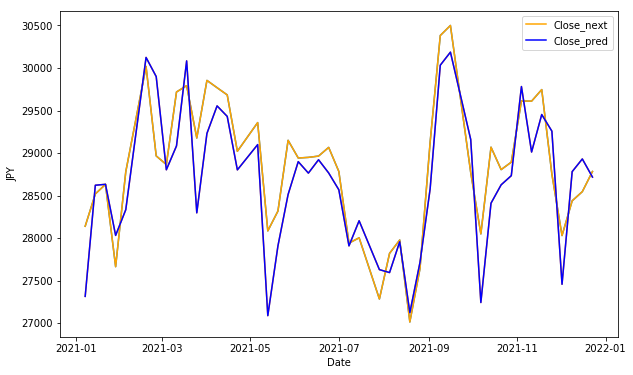

In [24]:
# 実際のデータと予測データの比較グラフ作成
plt.figure(figsize=(10, 6))
plt.plot(df_result[['Close_next', 'Close_pred']])
plt.plot(df_result['Close_next'], label='Close_next', color='orange')
plt.plot(df_result['Close_pred'], label='Close_pred', color='blue')
plt.xlabel('Date')
plt.ylabel('JPY')
xmin = df_result.index.min()
xmax = df_result.index.max()
plt.legend()
plt.show()

In [25]:
# 誤差を算出
df_result['diff'] = df_result['Close_pred'] - df_result['Close_next']

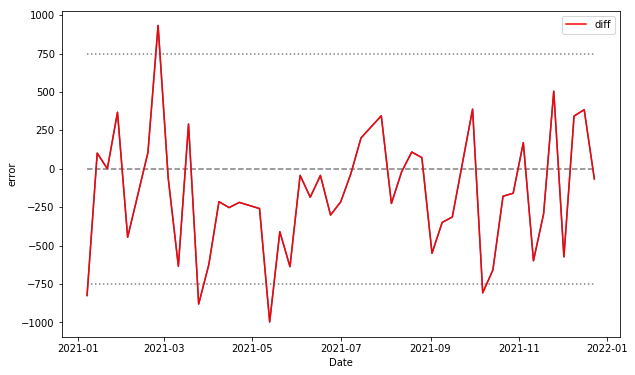

In [26]:
# 誤差のグラフ作成
plt.figure(figsize=(10, 6))
plt.plot(df_result[['diff']])
plt.plot(df_result['diff'], label='diff', color='red')
plt.xlabel('Date')
plt.ylabel('error')
plt.hlines(0, xmin, xmax, color='gray', linestyle='--')
plt.hlines(750, xmin, xmax, color='gray', linestyle=':')
plt.hlines(-750, xmin, xmax, color='gray', linestyle=':')
plt.legend()
plt.show()

<h2>予測モデルの係数と切片を確認</h2>

In [27]:
# 予測モデルの係数を確認
coef = pd.DataFrame(model.coef_) # データフレームの作成
coef.index = X_train.columns     # 項目名をインデックスに設定
coef

,0
High,-2.484113e-01
Low,-9.234009e-02
Open,3.949628e+10
Close,-3.949628e+10
Body,-3.949628e+10
Close_diff,-2.587902e-01
SMA1,-2.694505e-01
SMA2,-1.519415e-01
SMA3,4.854844e-02


In [28]:
# 予測モデルの切片を確認
model.intercept_

409.8866450575515

In [29]:
# X_train基本統計量の確認
X_train.describe()

,High,Low,Open,Close,Body,Close_diff,SMA1,SMA2,SMA3
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,22298.102686,22065.494843,22202.529083,22174.560721,27.968362,-23.304661,22173.247346,22164.036962,22154.239021
std,1559.027597,1602.983382,1558.689896,1593.250387,162.247579,265.426045,1548.152452,1500.769909,1451.165968
min,17160.970703,16358.190430,16995.769531,16552.830078,-371.429688,-915.179688,16944.800000,17647.499023,17983.368750
25%,21488.967773,21287.489746,21404.336914,21348.322754,-68.228027,-168.834473,21279.394238,21398.351172,21356.857747
50%,22285.825195,22065.250000,22189.254883,22191.609375,21.565430,-2.640625,22177.097070,22088.985742,22103.505404
75%,23203.060547,22888.586914,23110.392090,23023.372559,114.844238,124.198730,23138.541797,23093.306494,23126.927311
max,26868.089844,26719.230469,26744.500000,26809.369141,570.169922,750.558594,26727.373828,26697.680859,26696.868490
